# **Prediction de prix Euro (€) / USD ($)**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# this creates a symbolic link so that now the path /content/drive/My\ Drive/ is equal to /mydrive
!ln -s /content/drive/MyDrive/ /mydrive
!ls /mydrive

 capture.rar				     nfs.rar
 colab					    'Prediction de prix euro_usd'
'Colab Notebooks'			     prediction_prix.ipynb
'Copie de Bienvenue dans Colaboratorynull'   projet
'Copie de projetpython3.ipynb'		     projetpython
 detection_vehicule.ipynb		     video.rar
 MyDrive				     yolov3


In [3]:
%cd /mydrive

/content/drive/MyDrive


In [4]:
%cd projetpython

/content/drive/MyDrive/projetpython


In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
import tensorflow as tf

# **Lecture des données**



1.  **Dans cette etape on va lire le date quand on va utilisé**






In [8]:
Data = pd.read_csv('eurusd_hour.csv')




2.   **On va vérifié par cette fonction le contenu de notre data**



In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93084 entries, 0 to 93083
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    93084 non-null  object 
 1   Time    93084 non-null  object 
 2   BO      93084 non-null  float64
 3   BH      93084 non-null  float64
 4   BL      93084 non-null  float64
 5   BC      93084 non-null  float64
 6   BCh     93084 non-null  float64
 7   AO      93084 non-null  float64
 8   AH      93084 non-null  float64
 9   AL      93084 non-null  float64
 10  AC      93084 non-null  float64
 11  ACh     93084 non-null  float64
dtypes: float64(10), object(2)
memory usage: 8.5+ MB


# **Création des données d'entrainement et predictions/tests**



1.   **Dans cette etape on va choisit la colonne BO "BRID PRICE OPEN"-->"Prix de l'offre d'ouverture."**




In [9]:
Data["BO"]=pd.to_numeric(Data.BO,errors='coerce') #turning the Close column to numeric
Data = Data.dropna() #romeving the NA values
data = Data.iloc[:,2:3].values #selecting only the closing prices for training

###**==> Dans cette etape on va préparé notre colonne BO**



> #### ***Sklearn.preprocessing*** fournit plusieurs techniques de mise à l’échelle parmi ces techniques :



1.  ##### ***MinMaxScaler*** : Cette technique transforme les caractéristiques en adaptant chacune sur une plage donnée on donne plage entre [0,1] (calibre les données sur une plage de valeurs)
2.  ##### ***fit_transform*** : Ajuster aux données, puis les transformer.






In [10]:
sc = MinMaxScaler(feature_range=(0,1))
data = sc.fit_transform(data)
data.shape

(93084, 1)

#####**Le réseau LSTM (Long Short-Term Memory) de Keras prend en charge les pas de temps.**

> ***on utilise le décalage pour une série chronologique univariée peuvent être utilisées comme pas de temps pour un LSTM pour améliore les performances des prévisions.***

######**==> dans notre cas on a prendre 120 pas qui représente 5jours dans notre data**






In [11]:
x = []
y = []

for i in range (120,93084): #120 : timestep // 93084 : length of the data
    x.append(data[i-120:i,0]) #i-120=0 --> :i=120 -->93084
    y.append(data[i,0]) 

x,y = np.array(x),np.array(y)

######**Dans cette etape on a esseyé de diviser notre date par 2 partie une partie pour l'entrainement qui présente 97% et 3% pour le test**

```
 on a donné la plupart de data pour l'entrainement pour bien entrainer et bien comprendre notre data
```



In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.03,shuffle=False)

In [13]:
x_train = x_train.reshape(-1, x_train.shape[1], 1) #adding the batch_size axis
x_test = x_test.reshape(-1, x_test.shape[1], 1) #adding the batch_size axis

x_train.shape, x_test.shape

((90175, 120, 1), (2789, 120, 1))

#**Création du modèle de deep learning de type RNN utilisant LSTM**

**on a utilisé l'algorithme de deep learning des réseaux de neurones récurrents *ou RNN pour Recurrent Neural Networks* pour faire la prédiction et on a utilisé exactement LSTM *Long Short Term Memory***
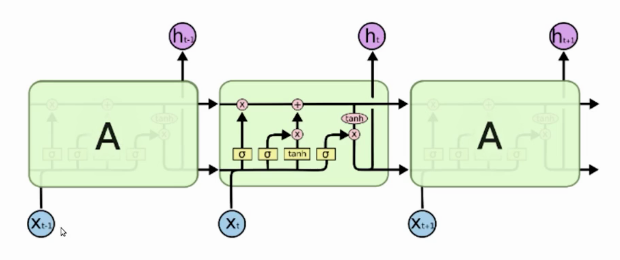

In [18]:
model = Sequential()
model.add(LSTM(
    1024, return_sequences=True, input_shape=(x_train.shape[1], 1)
))
model.add(Dropout(0.13))
model.add(LSTM(units=512, return_sequences=False))
model.add(Dropout(0.01))
model.add(Dense(1))
model.compile(optimizer='adam',loss="mean_squared_error")

# **Architecture graphique du modèle**

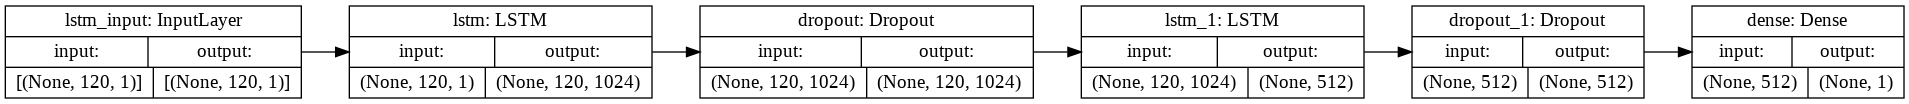

In [19]:
tf.keras.utils.plot_model(model, rankdir='LR', show_shapes=True)

#**Phase d'entraînement**

In [ ]:
hist = model.fit(
  x_train, y_train, epochs=15, batch_size=88, 
  validation_data=(x_test, y_test)
)
model.save('mydrive/model3.h5', overwrite=True)

Epoch 1/15
1025/1025 [==============================] - 185s 178ms/step - loss: 0.0035 - val_loss: 1.4154e-05
Epoch 2/15
1025/1025 [==============================] - 180s 176ms/step - loss: 5.3620e-05 - val_loss: 1.3495e-05
Epoch 3/15
1025/1025 [==============================] - 180s 176ms/step - loss: 5.9672e-05 - val_loss: 1.5611e-05
Epoch 4/15
1025/1025 [==============================] - 180s 176ms/step - loss: 5.3779e-05 - val_loss: 7.3851e-06
Epoch 5/15
1025/1025 [==============================] - 180s 175ms/step - loss: 4.8005e-05 - val_loss: 1.0857e-05
Epoch 6/15
1025/1025 [==============================] - 180s 176ms/step - loss: 4.3427e-05 - val_loss: 1.3924e-05
Epoch 7/15
1025/1025 [==============================] - 180s 176ms/step - loss: 4.1588e-05 - val_loss: 1.0040e-05
Epoch 8/15
1025/1025 [==============================] - 180s 176ms/step - loss: 4.3022e-05 - val_loss: 1.2201e-05
Epoch 9/15
1025/1025 [==============================] - 180s 176ms/step - loss: 3.6387e-05 -

#**Historique de l'entraînement**

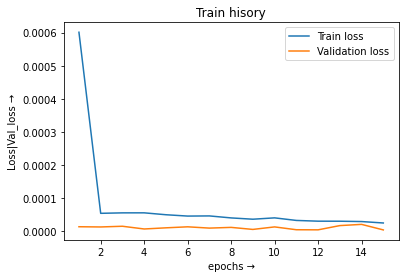

In [ ]:
losses = hist.history['loss']
val_losses = hist.history['val_loss']
epochs = range(1, len(losses)+1)

plt.figure()
plt.plot(epochs, losses, label='Train loss')
plt.plot(epochs, val_losses, label='Validation loss')
plt.xlabel('epochs →')
plt.ylabel('Loss|Val_loss →')
plt.title('Train hisory')
plt.legend()
plt.show()

#**Performance du modèle**


***==>Dans cette etape on va faire l'evalution de test***

In [ ]:
model.evaluate(x_test, y_test)

88/88 [==============================] - 2s 27ms/step - loss: 4.5617e-06


4.561731657304335e-06

#**Prédiction et visualisation des prédictions**

**==> On prend dans la prtie x_test les périodes quand va tester**

In [ ]:
x_test = x_test.reshape(-1, x_test.shape[1], 1)
x_test.shape
x_testd = x_test[1:25]
x_testw =x_test[1:169]

x_testm.shape

(360, 120, 1)

In [ ]:
import tensorflow as tf
Model = tf.keras.models.load_model('mydrive/model3.h5')
y_predd = Model.predict(x_testd)
y_predw = Model.predict(x_testw)
y_predm = Model.predict(x_testm)

In [ ]:
y_test = y_test.reshape(-1, 1)
y_test = sc.inverse_transform(y_test)  
predicted_priced = sc.inverse_transform(y_predd) #inversing the scaling transformation for ploting
predicted_pricew = sc.inverse_transform(y_predw)

print(predicted_pricew)

[[1.1046973]
 [1.105026 ]
 [1.104574 ]
 [1.1052418]
 [1.1054566]
 [1.1052219]
 [1.1053344]
 [1.1047858]
 [1.1050028]
 [1.105269 ]
 [1.1054676]
 [1.1057003]
 [1.1060965]
 [1.1063726]
 [1.1061542]
 [1.1061282]
 [1.1061636]
 [1.1057047]
 [1.1059661]
 [1.1061722]
 [1.1058584]
 [1.1060677]
 [1.1058215]
 [1.105667 ]
 [1.1066189]
 [1.1079357]
 [1.1079038]
 [1.1081039]
 [1.1078993]
 [1.1075134]
 [1.1073904]
 [1.1070433]
 [1.1069986]
 [1.107083 ]
 [1.1067951]
 [1.1068625]
 [1.107107 ]
 [1.1073632]
 [1.1074405]
 [1.1074845]
 [1.1078045]
 [1.1068746]
 [1.1069402]
 [1.106792 ]
 [1.1068152]
 [1.1075749]
 [1.1074243]
 [1.1076022]
 [1.1072661]
 [1.1078641]
 [1.1073462]
 [1.1078521]
 [1.1081318]
 [1.107742 ]
 [1.107567 ]
 [1.1075623]
 [1.1076185]
 [1.1076576]
 [1.107698 ]
 [1.1071327]
 [1.1073328]
 [1.107294 ]
 [1.1071829]
 [1.1072825]
 [1.106925 ]
 [1.1067641]
 [1.1059685]
 [1.1062183]
 [1.1064969]
 [1.1056484]
 [1.105555 ]
 [1.1061999]
 [1.1075922]
 [1.1065809]
 [1.1062096]
 [1.1064856]
 [1.1065559]

==>**Quand on esseyé de designer notre graphe on a trouvé un probléme**

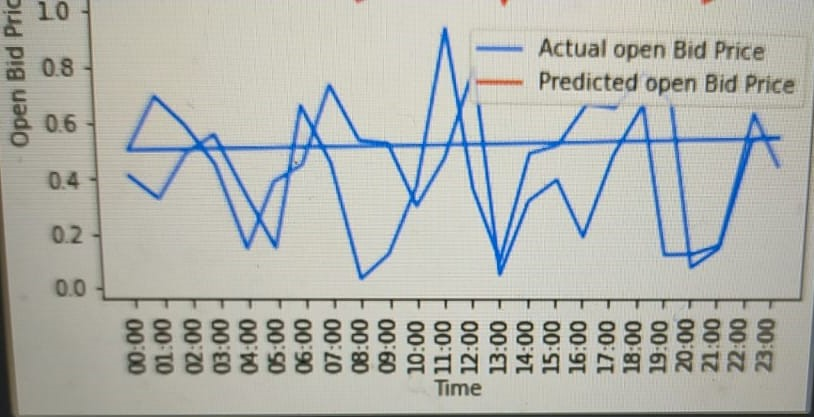 
**==>donc on a resolu e probleme par l'ajout d'un colonne qui concate la date et time**

In [ ]:
date = Data.iloc[:,0:1].values
x_date=[]
for i in range(0,93084):
  x_date.append(date[i,0])

x_date = np.array(x_date)
time = Data.iloc[:,1:2].values
x_time=[]
for i in range(0,93084):
  x_time.append(time[i,0])

x_time = np.array(x_time)
print(x_date)
espace = [" "]
#date = data.Date
list = [f'{x_date[i]+espace[0]+x_time[i]}' for i in range(data.shape[0])]
Data['hours'] = list
Data


['2005-05-02' '2005-05-02' '2005-05-02' ... '2020-04-29' '2020-04-29'
 '2020-04-29']


,Date,Time,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh,hours
0,2005-05-02,00:00,1.28520,1.28520,1.28400,1.28440,-0.00080,1.28540,1.28540,1.28420,1.28460,-0.00080,2005-05-02 00:00
1,2005-05-02,01:00,1.28440,1.28480,1.28390,1.28420,-0.00020,1.28460,1.28500,1.28410,1.28440,-0.00020,2005-05-02 01:00
2,2005-05-02,02:00,1.28430,1.28540,1.28410,1.28510,0.00080,1.28450,1.28560,1.28430,1.28530,0.00080,2005-05-02 02:00
3,2005-05-02,03:00,1.28510,1.28590,1.28500,1.28510,0.00000,1.28530,1.28610,1.28520,1.28530,0.00000,2005-05-02 03:00
4,2005-05-02,04:00,1.28520,1.28590,1.28490,1.28550,0.00030,1.28540,1.28610,1.28510,1.28570,0.00030,2005-05-02 04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93079,2020-04-29,18:00,1.08620,1.08851,1.08611,1.08713,0.00093,1.08660,1.08865,1.08640,1.08726,0.00066,2020-04-29 18:00
93080,2020-04-29,19:00,1.08711,1.08823,1.08659,1.08748,0.00037,1.08725,1.08837,1.08675,1.08760,0.00035,2020-04-29 19:00
93081,2020-04-29,20:00,1.08747,1.08788,1.08691,1.08708,-0.00039,1.08758,1.08810,1.08706,1.08808,0.00050,2020-04-29 20:00
93082,2020-04-29,21:00,1.08708,1.08740,1.08699,1.08714,0.00006,1.08808,1.08814,1.08763,1.08766,-0.00042,2020-04-29 21:00


In [ ]:
date_time = Data.iloc[:,12:13].values
#time day
x_timed = []
for i in range (90176,90200): 
    x_timed.append(date_time[i,0])  
x_timed = np.array(x_timed)
#print(x_timed)
#time week
x_timew = []
for i in range (90176,90344): 
    x_timew.append(date_time[i,0])  
x_timew = np.array(x_timew)
#print(x_timew)
#test day
testd =[]
for i in range (24):
   testd.append(y_test[i])
#print(testd)  
#week test
testw =[]
for i in range (168):
   testw.append(y_test[i])
#print(testw)

#**Quelques prédictions**

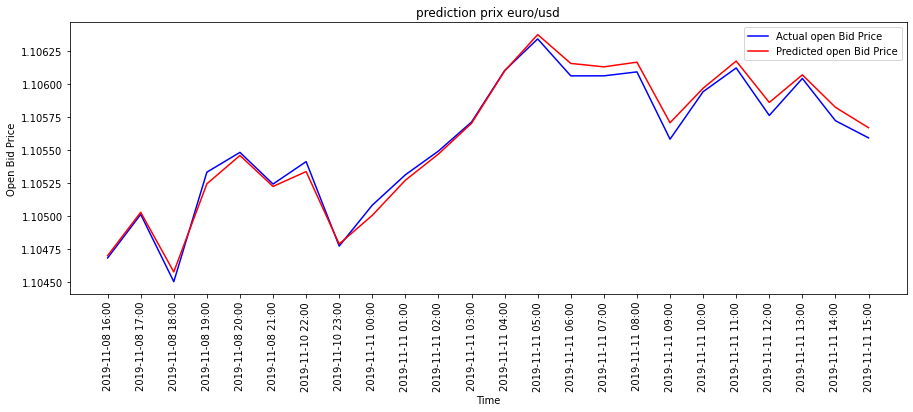

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(x_timed,testd, color = 'blue', label = 'Actual open Bid Price')
plt.plot(x_timed,predicted_priced, color = 'red', label = 'Predicted open Bid Price')
plt.title('prediction prix euro/usd')
plt.xlabel('Time')
plt.ylabel('Open Bid Price')
plt.legend()
plt.xticks(x_timed, rotation=90)
plt.show()

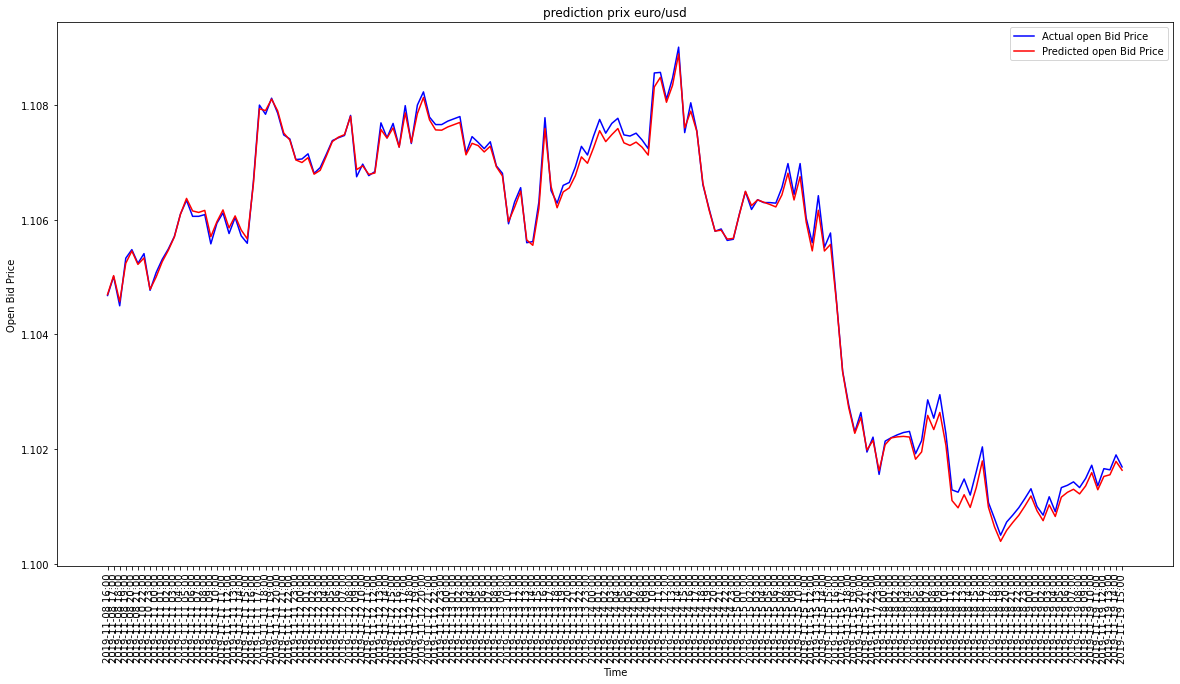

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(x_timew,testw, color = 'blue', label = 'Actual open Bid Price')
plt.plot(x_timew,predicted_pricew, color = 'red', label = 'Predicted open Bid Price')
plt.title('prediction prix euro/usd')
plt.xlabel('Time')
plt.ylabel('Open Bid Price')
plt.legend()
plt.xticks(x_timew, rotation=90)
plt.show()